# Import Library

In [1]:
#Import library preprocessing

import time
import random as rd
import zipfile, os # Library untuk mendownload zipfile
from tqdm import tqdm # Sebagai pemanis visual saat mengimport gambar ke dalam array list
import numpy as np  # Library untuk mengubah gambar menjadi array
import tensorflow as tf # Library Tensorflow
from tensorflow.keras.optimizers import RMSprop # Mengimport optimizer untuk model
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Library untuk Augmentasi gambar
from tensorflow.keras import regularizers # Library untuk mencegah overfitting pada model
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint # Mengimport learningrate dan model checkpoint
from sklearn.preprocessing import LabelEncoder # Untuk mengubah index menjadi string label
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical # Untuk melabeli gambar
import cv2 # Mengimport gambar

#Import library visualisasi
import matplotlib.image as mpimg  # Library untuk visualisai gambar dengan plot
import matplotlib.pyplot as plt # Library untuk visualisai plot
%matplotlib inline
import seaborn as sns # Library untuk visualisai plot lebih bagus



# Deploy Model Ringan

In [2]:
model_ringan = tf.keras.models.load_model('model_rusakRingan/rusak_ringan.h5') # Load Model
model_ringan.load_weights('model_rusakRingan/weightsModel_rusak_ringan.h5') # Load Model Weights
model_ringan.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 224, 224, 32)      2432      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 112, 112, 64)      51264     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 56, 56, 64)       

[[1]]
[[1.]]
non_cracked


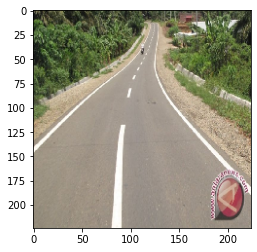

In [6]:
#path = 'test_gambar/004-113.jpg'
path = 'test_gambar/jalan_crack2.jpg' # aman
# path = 'test_gambar/jalan_bagus.jpg'
img = image.load_img(path, target_size=(224,224))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
pred = model_ringan.predict(images, batch_size=10)
classes = np.where(pred>0.5, 1, 0)
#classes = np.argmax(pred,axis=1)

print(classes)
print(pred)
if classes == 0:
    print('cracked')

else :
    print('non_cracked')
  

# Deploy Model Berat-Sedang

In [4]:
model_berat_sedang = tf.keras.models.load_model('model_rusakBerat-Sedang/model_rusak_berat-sedang.h5') # Load Model
model_berat_sedang.load_weights('model_rusakBerat-Sedang/weightsModel_berat-sedang.h5') # Load Model Weights
model_berat_sedang.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 100, 100, 32)      2432      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 50, 50, 64)        51264     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 50, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 25, 25, 64)       

1.0
[[1]]
[[1.]]
rusak_sedang


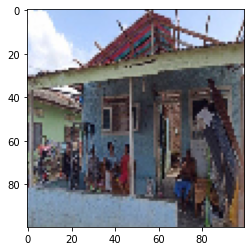

In [7]:
#path = 'test_gambar/rusakhancur.jpg'
path = 'test_gambar/tes_rumah_sedang.jpg'
#path = 'test_gambar/rumah_bagus.jpg'
img = image.load_img(path, target_size=(100,100))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
pred = model_berat_sedang.predict(images, batch_size=10)
print(float(pred))
classes = np.where(pred>0.5, 1, 0)
#classes = np.argmax(pred,axis=1)

print(classes)
print(pred)
if classes == 0:
    #print(pred)
    print('rusak_berat')
#     elif classes == 1:
#       print('rusak_berat') 
else :
    print('rusak_sedang')

# Deploy Model Bagus, Berat, Sedang

In [8]:
model = tf.keras.models.load_model('model_rusakBerat-Sedang-Bagus/model_rusak_berat-sedang-bagus.h5') # Load Model
model.load_weights('model_rusakBerat-Sedang-Bagus/weightsModel_berat-sedang-bagus.h5') # Load Model Weights
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 100, 100, 32)      2432      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 100, 100, 32)      25632     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 50, 50, 64)        51264     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 50, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 25, 25, 64)       

[0]
rumah_bagus


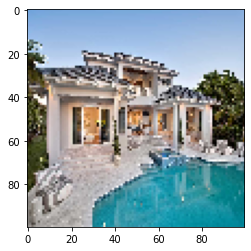

In [12]:
#path = 'test_gambar/rumah_bagus.jpg' # aman
#path = 'test_gambar/tes_rumah_sedang.jpg' # aman
#path = 'test_gambar/rusakberat1 (44) - Copy - Copy - Copy.jpg' # aman
#path = 'test_gambar/rusak_sedang (3).jpeg' # aman
img = image.load_img(path, target_size=(100,100))

imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
pred = model.predict(x, batch_size=3)
#classes = np.where(pred>0.5, 1, 0)
classes = np.argmax(pred,axis=1)

print(classes)
#print(pred)
if classes == 0:
    #print(pred)
    print('rumah_bagus')
elif classes == 1:
    print('rusak_berat') 
else:
    print('rusak_sedang')
  